In [1]:
%pip install librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import librosa
import os
data_path = "local/inst_dataset"
count = {}
file_list = os.listdir(data_path)

for file_name in file_list:
    if file_name.endswith(".wav") or file_name.endswith(".aif"):
        label = file_name.split("-")[0]
        if label not in count:
            count[label] = 0
        count[label] += 1
print(count)


{'ASax': 73, 'Fl': 199, 'Hn': 170, 'Vn': 279}


In [8]:
import matplotlib.pyplot as plt
import librosa.display

# 选择一个音频文件
audio_file = os.path.join(data_path, file_list[0])

# 加载音频
y, sr = librosa.load(audio_file, sr=None)


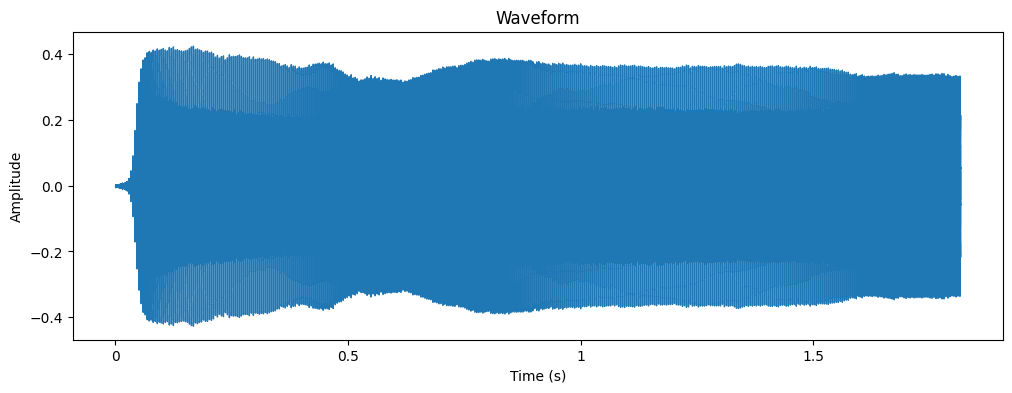

In [9]:
# 画波形
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


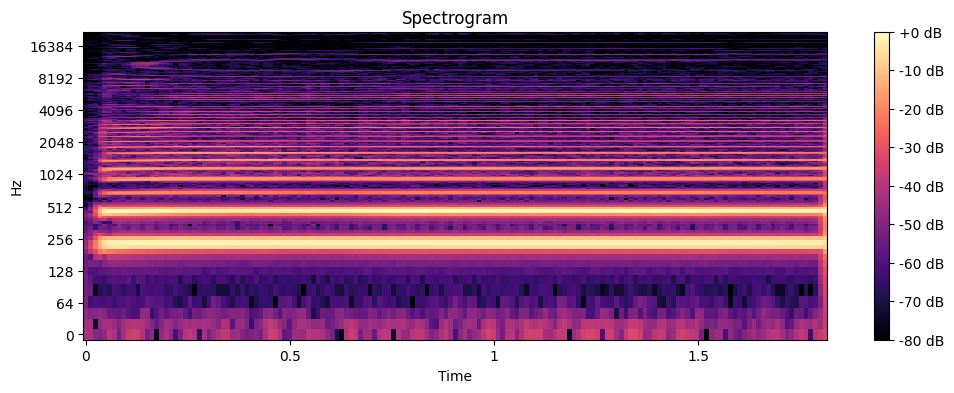

In [10]:
import numpy as np
# 画频谱（幅度谱）
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [15]:
def extract_feature(file_path: str) -> np.ndarray:
    y, sr = librosa.load(file_path, sr=None)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    spectral_flatness = librosa.feature.spectral_flatness(y=y)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    print(file_path)
    return [
        *np.mean(spectral_centroid.T, axis=0),
        *np.mean(spectral_rolloff.T, axis=0),
        *np.mean(spectral_flatness.T, axis=0),
        *np.mean(spectral_contrast.T, axis=0)
    ]

In [25]:
def extract_feature_mfcc(file_path: str) -> np.ndarray:
    y, sr = librosa.load(file_path, sr=None)
    extract_feature_mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    print(file_path)
    return np.mean(extract_feature_mfcc.T, axis=0)

In [ ]:
[*[1,2,3], *[4,5,6]]

[1, 2, 3, 4, 5, 6]

In [13]:
{ **{"a":1, "b":2}, **{"c":3, "d":4} }

{'a': 1, 'b': 2, 'c': 3, 'd': 4}

In [26]:
x = [] # data
y = [] # labels

for file_name in file_list:
    label = file_name.split("-")[0]
    file_path = os.path.join(data_path, file_name)
    feature = extract_feature_mfcc(file_path)
    x.append(feature)
    y.append(label)

x = np.array(x)
y = np.array(y)

local/inst_dataset\ASax-ord-A#3-ff.wav
local/inst_dataset\ASax-ord-A#3-mf.wav
local/inst_dataset\ASax-ord-A#3-pp.wav
local/inst_dataset\ASax-ord-A#4-ff.wav
local/inst_dataset\ASax-ord-A#4-mf.wav
local/inst_dataset\ASax-ord-A3-ff.wav
local/inst_dataset\ASax-ord-A3-mf.wav
local/inst_dataset\ASax-ord-A3-pp.wav
local/inst_dataset\ASax-ord-A4-ff.wav
local/inst_dataset\ASax-ord-A4-mf.wav
local/inst_dataset\ASax-ord-B3-ff.wav
local/inst_dataset\ASax-ord-B3-mf.wav
local/inst_dataset\ASax-ord-B3-pp.wav
local/inst_dataset\ASax-ord-B4-ff.wav
local/inst_dataset\ASax-ord-B4-mf.wav
local/inst_dataset\ASax-ord-C#3-ff.wav
local/inst_dataset\ASax-ord-C#3-mf.wav
local/inst_dataset\ASax-ord-C#3-pp.wav
local/inst_dataset\ASax-ord-C#5-ff.wav
local/inst_dataset\ASax-ord-C#5-mf.wav
local/inst_dataset\ASax-ord-C#5-pp.wav
local/inst_dataset\ASax-ord-C5-ff.wav
local/inst_dataset\ASax-ord-C5-mf.wav
local/inst_dataset\ASax-ord-C5-pp.wav
local/inst_dataset\ASax-ord-D#3-ff.wav
local/inst_dataset\ASax-ord-D#3-mf.wav

In [27]:
x.shape, y.shape

((721, 13), (721,))

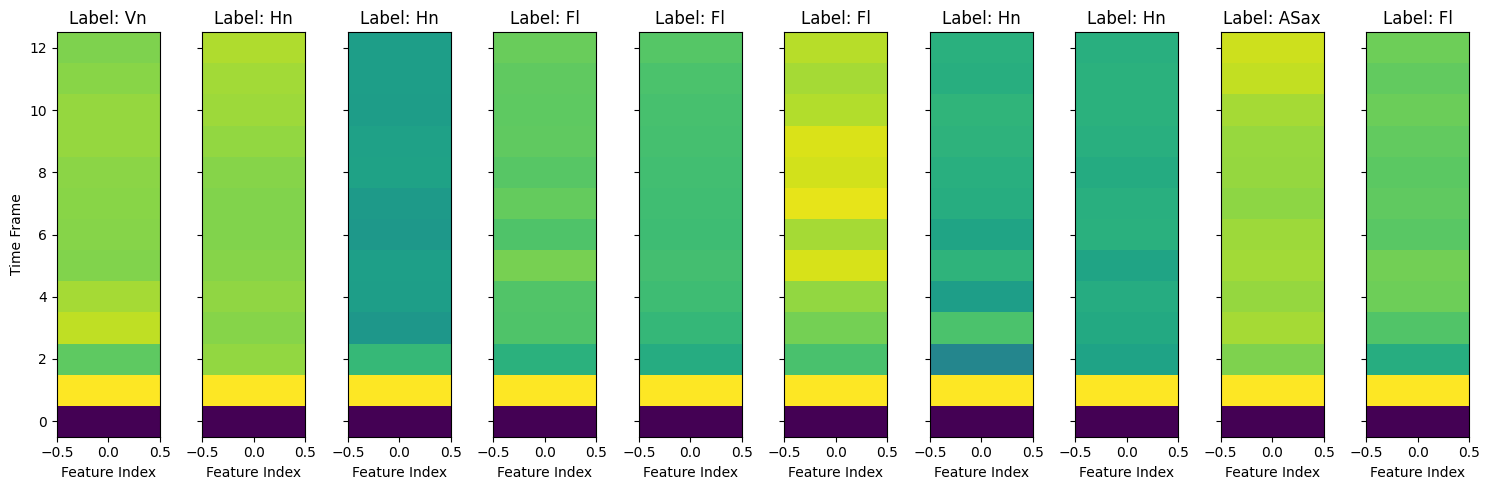

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((576, 13), (145, 13), (576,), (145,))

In [ ]:
num_samples = 10  # Adjust the number of samples to display
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5), sharey=True)

for i in range(num_samples):
    ax = axes[i]
    ax.imshow(x_train[i].reshape(-1, 1), aspect='auto', cmap='viridis', origin='lower')
    ax.set_title(f"Label: {y_train[i]}")
    ax.set_xlabel("Feature Index")
    if i == 0:
        ax.set_ylabel("Time Frame")

plt.tight_layout()
plt.show()

In [34]:
svc = SVC(kernel='rbf', gamma=0.0001)
svc.fit(x_train, y_train)

SVC(gamma=0.0001)

In [35]:
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ASax       1.00      1.00      1.00        18
          Fl       1.00      1.00      1.00        45
          Hn       1.00      1.00      1.00        34
          Vn       1.00      1.00      1.00        48

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



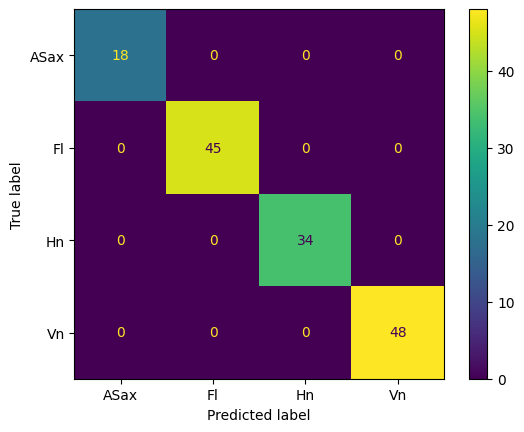

In [36]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()